<a href="https://colab.research.google.com/github/raihanhd12/PCVK_Genap_2023/blob/main/Minggu%2010/Week%2010.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
from sklearn.cluster import KMeans

In [3]:
img = cv.imread('/content/drive/MyDrive/Kuliah/Semester 6/PCVK/Images/gradient.jpg')
img_balon = cv.imread('/content/drive/MyDrive/Kuliah/Semester 6/PCVK/Images/balloon.jpg')

In [4]:
def binary_threshold(img, thresh):
    """
    Implementasi thresholding binary.
    Jika nilai piksel di img > thresh, maka akan menjadi 1 (putih),
    selain itu akan menjadi 0 (hitam).
    """
    img = img.copy()
    img[img > thresh] = 255
    img[img <= thresh] = 0
    return img

def binary_inv_threshold(img, thresh):
    """
    Implementasi thresholding binary inverse.
    Jika nilai piksel di img > thresh, maka akan menjadi 0 (hitam),
    selain itu akan menjadi 1 (putih).
    """
    img = img.copy()
    img[img > thresh] = 0
    img[img <= thresh] = 255
    return img

def trunc_threshold(img, thresh):
    """
    Implementasi thresholding truncate.
    Jika nilai piksel di img > thresh, maka akan tetap sama,
    selain itu akan menjadi nilai threshold.
    """
    img = img.copy()
    img[img > thresh] = thresh
    return img

def tozero_threshold(img, thresh):
    """
    Implementasi thresholding tozero.
    Jika nilai piksel di img > thresh, maka akan tetap sama,
    selain itu akan menjadi 0.
    """
    img = img.copy()
    img[img <= thresh] = 0
    return img

def tozero_inv_threshold(img, thresh):
    """
    Implementasi thresholding tozero inverse.
    Jika nilai piksel di img > thresh, maka akan menjadi 0,
    selain itu akan tetap sama.
    """
    img = img.copy()
    img[img > thresh] = 0
    return img

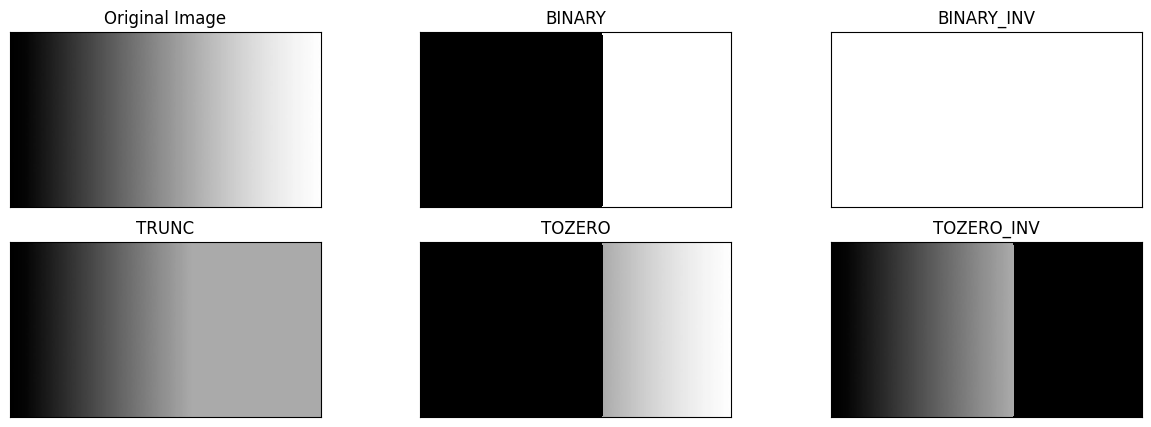

In [5]:
# Nilai threshold
thresh = 170

# Thresholding
thresh1 = binary_threshold(img, thresh)
thresh2 = binary_inv_threshold(img, thresh)
thresh3 = trunc_threshold(img, thresh)
thresh4 = tozero_threshold(img, thresh)
thresh5 = tozero_inv_threshold(img, thresh)

# Plot gambar-gambar hasil thresholding
titles = ['Original Image','BINARY','BINARY_INV','TRUNC', 'TOZERO', 'TOZERO_INV'] 
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5] 
plt.figure(figsize = (15,5)) 
for i in range(len(images)): 
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray', interpolation='nearest') 
    plt.title(titles[i]) 
    plt.xticks([]),plt.yticks([]) 
plt.show()

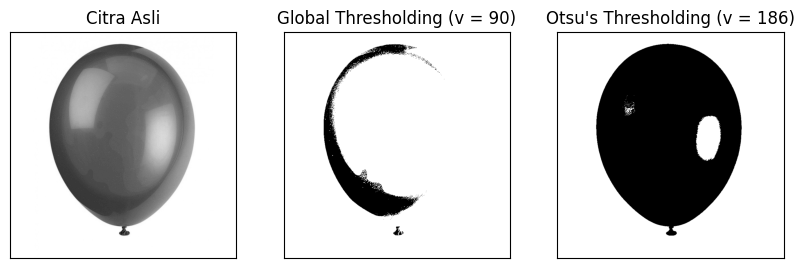

In [6]:
# Convert image to grayscale
img_balon_gray = cv.cvtColor(img_balon, cv.COLOR_BGR2GRAY)

# Compute histogram of the grayscale image
hist, bins = np.histogram(img_balon_gray.ravel(), bins=256, range=(0, 255))

# Compute total number of pixels in the grayscale image
total_pixels = img_balon_gray.shape[0] * img_balon_gray.shape[1]

# Initialize variables for optimal threshold value and maximum variance
optimal_thresh = 0
max_var = 0

# Loop through all possible threshold values from 0 to 255
for t in range(256):

    # Compute probabilities of pixels below and above the threshold
    prob_below = np.sum(hist[:t]) / total_pixels
    prob_above = np.sum(hist[t:]) / total_pixels

    # Compute mean intensities of pixels below and above the threshold
    mean_below = np.sum(hist[:t] * np.arange(t)) / (np.sum(hist[:t]) + 1e-5)
    mean_above = np.sum(hist[t:] * np.arange(t, 256)) / (np.sum(hist[t:]) + 1e-5)

    # Compute variance between the classes using Otsu's formula
    var_between = prob_below * prob_above * (mean_below - mean_above) ** 2

    # Update optimal threshold and maximum variance if var_between is larger
    if var_between > max_var:
        optimal_thresh = t
        max_var = var_between

# Apply optimal threshold to the grayscale image
img_balon_otsu = np.zeros_like(img_balon_gray)
img_balon_otsu[img_balon_gray > optimal_thresh] = 255

# Display results
global_treshold = 90
titles = ['Citra Asli', 'Global Thresholding (v = {})'.format(global_treshold), "Otsu's Thresholding (v = {})".format(optimal_thresh)]
images = [cv.cvtColor(img_balon, cv.COLOR_BGR2GRAY), img_balon_gray > global_treshold, img_balon_otsu]
plt.figure(figsize=(10, 10))
for i in range(len(images)):
    plt.subplot(3, 3, i + 1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
plt.show()

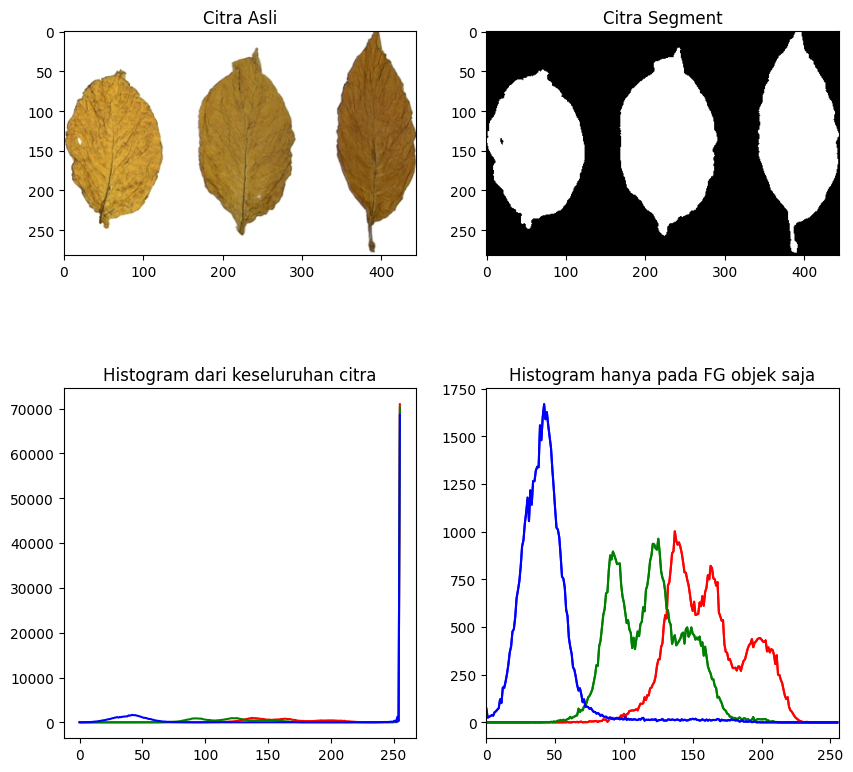

In [7]:
# Load image
img = cv.imread('/content/drive/MyDrive/Kuliah/Semester 6/PCVK/Images/tobacco.jpg')

img = cv.cvtColor(img,cv.COLOR_BGR2RGB) 
img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

ret3,mask = cv.threshold(img_gray,200,255,cv.THRESH_BINARY_INV)

plt.figure(figsize = (10,10)) 
plt.subplot(2,2,1),plt.imshow(img) 
plt.title('Citra Asli') 
plt.subplot(2,2,2),plt.imshow(mask, 'gray') 
plt.title('Citra Segment') 
color = ('r','g','b') 
for i,col in enumerate(color):
    hist0 = cv.calcHist([img],[i],None,[256],[0,256])   
    plt.subplot(2,2,3),plt.plot(hist0,color = col) 
    plt.title('Histogram dari keseluruhan citra') 
    hist1 = cv.calcHist([img],[i],mask,[256],[0,256]) 
    plt.subplot(2,2,4),plt.plot(hist1,color = col)
    plt.title('Histogram dari keseluruhan citra') 
    hist1 = cv.calcHist([img],[i],mask,[256],[0,256]) 
    plt.subplot(2,2,4),plt.plot(hist1,color = col) 
    plt.title('Histogram hanya pada FG objek saja')
    plt.xlim([0,256]) 
plt.show()

In [8]:
# Load image
img = cv.imread('/content/drive/MyDrive/Kuliah/Semester 6/PCVK/Images/peppers.jpg')

# Convert BGR to RGB color space
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Reshape image to a 2D array of pixels and 3 color values (RGB)
pixels = img.reshape((-1, 3))

# Define number of clusters (in this case, 2 clusters: yellow and non-yellow)
k = 2

# Define criteria for K-Means algorithm and run the algorithm
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)
_, labels, centers = cv.kmeans(pixels.astype(np.float32), k, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)

# Convert centers to 8-bit values and reshape back to original image shape
centers = np.uint8(centers)
segmented_img = centers[labels.flatten()]
segmented_img = segmented_img.reshape(img.shape)

# Extract only yellow pixels by comparing the mean of blue and green channels to red channel
mean_colors = centers.mean(axis=1)
yellow_centers = centers[np.where(mean_colors[:, 0] >= mean_colors[:, 1])]

# Convert only yellow centers to 8-bit values and reshape back to original image shape
yellow_centers = np.uint8(yellow_centers)
yellow_segmented_img = yellow_centers[labels.flatten()]
yellow_segmented_img = yellow_segmented_img.reshape(img.shape)

# Display original image and segmented image with only yellow color
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1), plt.imshow(img)
plt.title('Original Image')
plt.subplot(1, 2, 2), plt.imshow(yellow_segmented_img)
plt.title('Yellow Segmented Image')
plt.show()

IndexError: ignored